In [11]:
# data_preprocessing.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load synthetic data
data = pd.read_csv('synthetic_ocean_data.csv')

# Define features and targets
features = data.drop([
    'coral_health', 
    'plastic_accumulation', 
    'carbon_sequestration'
], axis=1)

targets = data[[
    'coral_health', 
    'plastic_accumulation', 
    'carbon_sequestration'
]]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    features, targets, test_size=0.2, random_state=42
)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib  # Add this line

# Load synthetic data
data = pd.read_csv('synthetic_ocean_data.csv')

# Define features and targets
features = data.drop(['coral_health', 'plastic_accumulation', 'carbon_sequestration'], axis=1)
targets = data[['coral_health', 'plastic_accumulation', 'carbon_sequestration']]

# Split data
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Normalize features and save the scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')  # <-- This creates scaler.pkl

['scaler.pkl']

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import MeanSquaredError  # <-- Add this

# Define model architecture
input_layer = Input(shape=(X_train.shape[1],))
hidden_1 = Dense(128, activation='relu')(input_layer)
hidden_2 = Dense(64, activation='relu')(hidden_1)
output_layer = Dense(3, activation='linear')(hidden_2)

model = Model(inputs=input_layer, outputs=output_layer)

# Use explicit loss function
model.compile(
    optimizer='adam',
    loss=MeanSquaredError(),  # Replace 'mse' with the class
    metrics=['mae']
)

# Train and save the model (same as before)
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)
model.save('ocean_health_model.h5')

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 7741.2583 - mae: 47.3624 - val_loss: 614.1329 - val_mae: 15.8547
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 382.5887 - mae: 12.6095 - val_loss: 173.5827 - val_mae: 9.1632
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 151.6258 - mae: 8.7418 - val_loss: 142.8696 - val_mae: 8.5796
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 134.5136 - mae: 8.4271 - val_loss: 122.5424 - val_mae: 8.1125
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 115.5855 - mae: 7.9503 - val_loss: 102.4430 - val_mae: 7.5754
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 96.7286 - mae: 7.4113 - val_loss: 89.4470 - val_mae: 7.1911
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 85.6017 - mae: 7.0179 - val_loss: 83.1637 - val_mae: 6.9916
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 78.9086 - mae: 6.7680 - val_loss: 77.1676 - val_mae: 6.7803
Epoch 9/50
200/200 ━━━━━━━

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70.3910 - mae: 6.4522
Test Loss: 69.14
Test MAE: 6.41


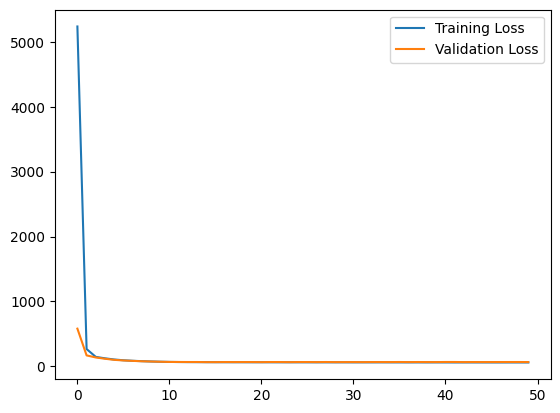

In [14]:
# model_evaluation.py
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.2f}")
print(f"Test MAE: {mae:.2f}")

# Plot training history (optional)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [10]:
# dashboard.py
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Load test data for visualization
test_data = pd.read_csv('synthetic_ocean_data.csv').sample(n=1000)

# Initialize Dash app
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Ocean Health Dashboard"),
    dcc.Graph(id='coral-graph'),
    dcc.Graph(id='plastic-graph'),
    dcc.Graph(id='carbon-graph'),
    dcc.Interval(id='interval', interval=1000)  # Update every 1 second
])

# Callbacks to update graphs
@app.callback(
    [Output('coral-graph', 'figure'),
     Output('plastic-graph', 'figure'),
     Output('carbon-graph', 'figure')],
    [Input('interval', 'n_intervals')]
)
def update_graphs(n):
    coral_fig = px.scatter(
        test_data, x='sea_surface_temp', y='coral_health',
        title='Coral Health vs. Temperature'
    )
    plastic_fig = px.histogram(
        test_data, x='plastic_concentration', 
        title='Plastic Distribution'
    )
    carbon_fig = px.line(
        test_data, y='carbon_sequestration',
        title='Carbon Sequestration Over Time'
    )
    return coral_fig, plastic_fig, carbon_fig

# Run app
if __name__ == '__main__':
    app.run_server(debug=True)